In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lpf
from integral import integral

In [6]:
df = pd.read_csv('memdata_TSND121-13121423_2019-05-20.csv', header=None,
                 names=['item', 't', 'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z'])

In [7]:
df.head()

,item,t,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
0,ags,51657683,2508,10181,1854,557,1804,-1670
1,ags,51657684,2508,10162,1910,538,1780,-1651
2,ags,51657685,2417,10164,1839,532,1773,-1639
3,ags,51657686,2386,10142,1891,514,1755,-1615
4,ags,51657687,2376,10110,1871,490,1737,-1590


In [8]:
y = np.array(df['omega_y'])/100

In [9]:
zeta = lpf.lpfilter(y, 20)

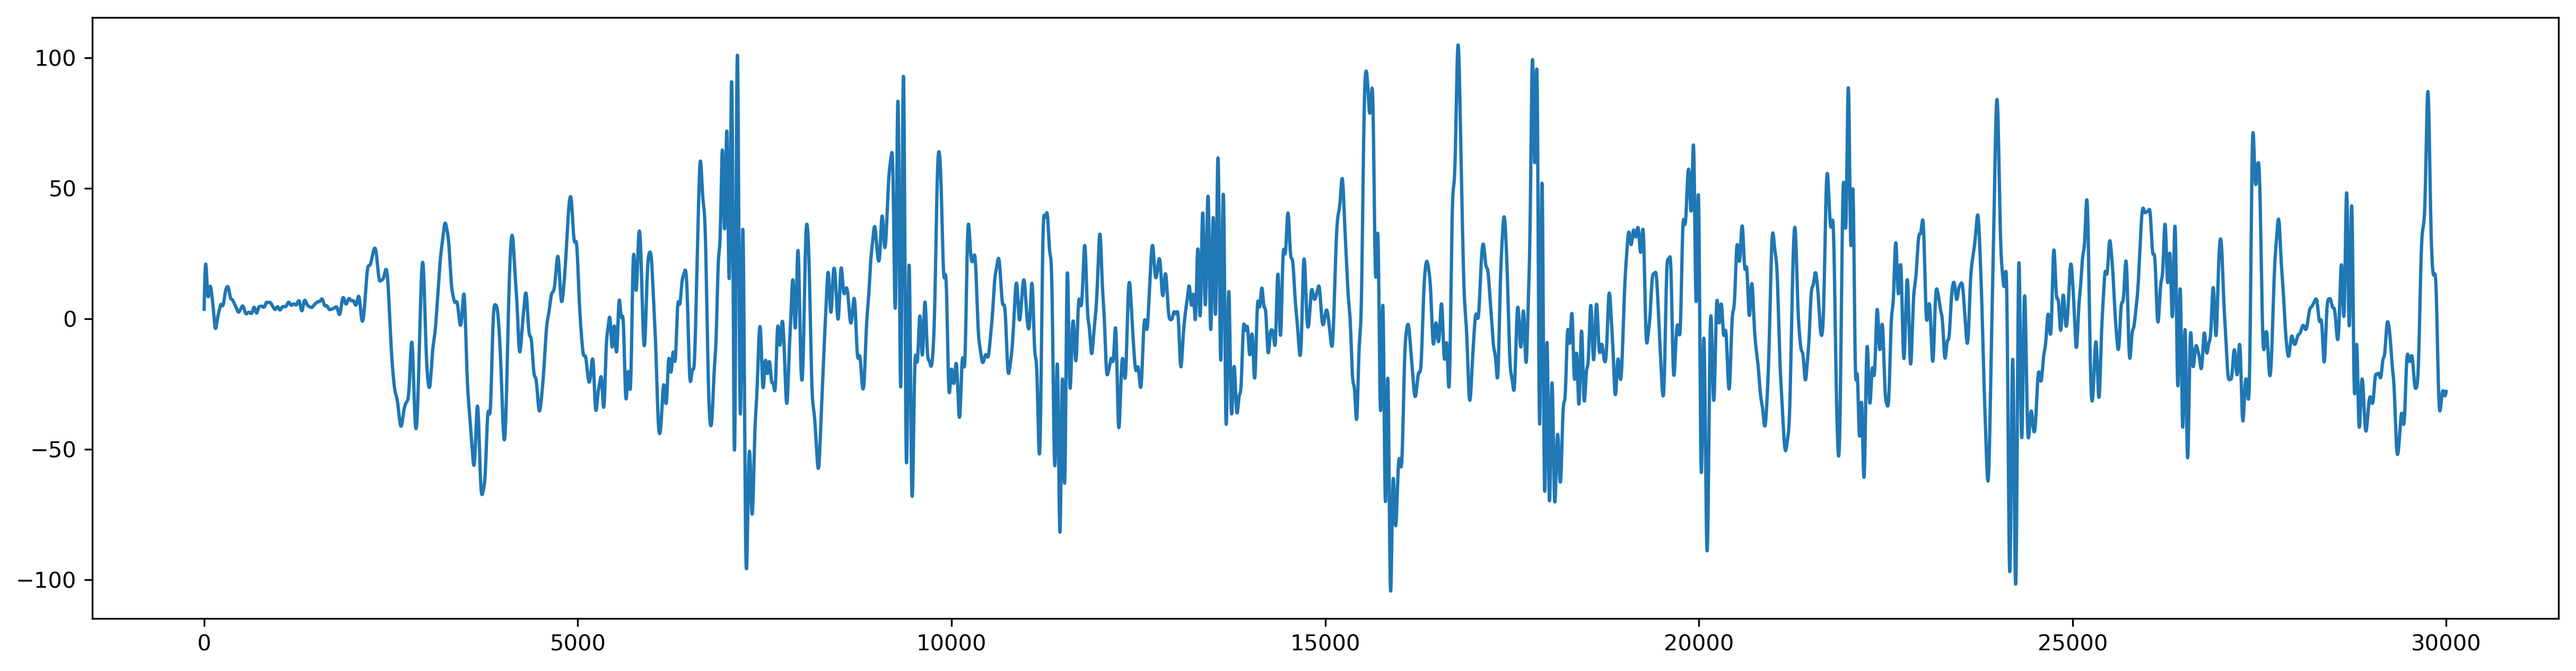

In [10]:
plt.figure(figsize=(20,5), dpi=300)
plt.plot(zeta[:30000])

In [11]:
theta = integral(zeta, 0, 0, 30000)
#mu = np.mean(theta)
#theta = theta - mu

Text(0,0.5,'anle[deg]')

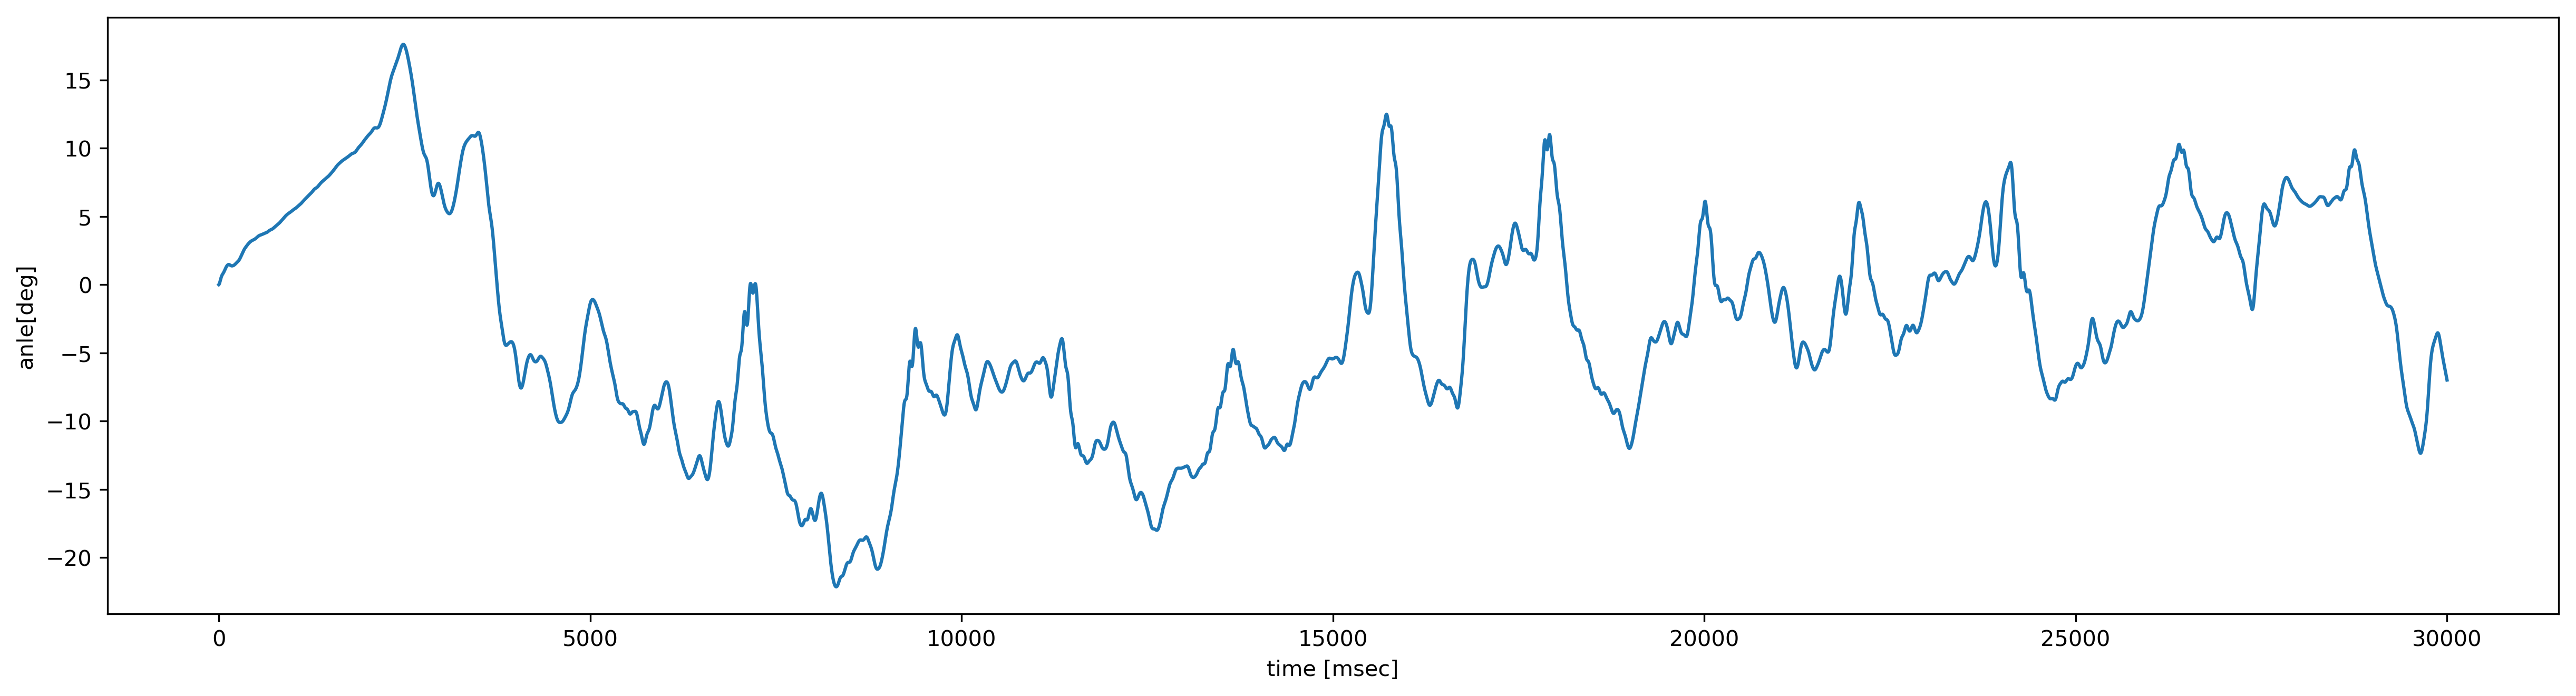

In [12]:
plt.figure(figsize=(20,5), dpi=300)
plt.plot(theta)
plt.xlabel('time [msec]')
plt.ylabel('anle[deg]')

Text(0,0.5,'anglar velocity[deg/sec]')

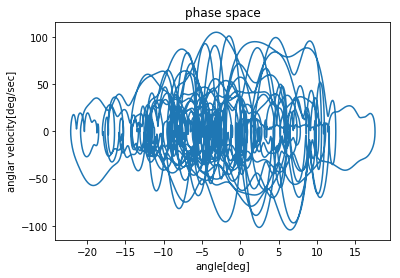

In [13]:
plt.plot(theta[0:30000], zeta[0:30000])
plt.title('phase space')
plt.xlabel('angle[deg]')
plt.ylabel('anglar velocity[deg/sec]')

In [14]:
import matplotlib.animation as anim
%matplotlib nbagg

<IPython.core.display.Javascript object>


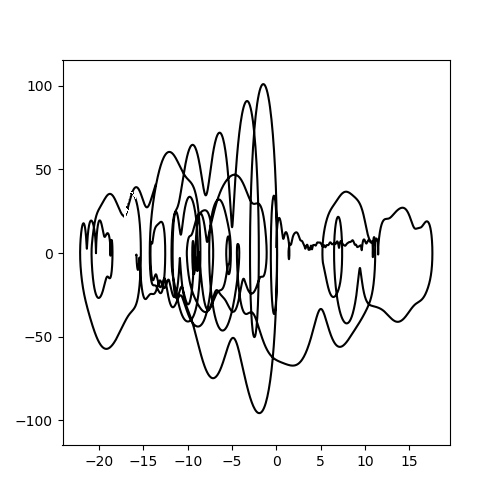

In [15]:
fig = plt.figure(figsize=(5,5))
ims = []
for i in range(0, 30000, 20):
    im = plt.plot(theta[0:i], zeta[0:i], "black")
    #plt.yli
    ims.append(im)
ani = anim.ArtistAnimation(fig, ims, interval=10)
plt.show()